In [13]:
!pip install pandas numpy scikit-learn pymc3 matplotlib

In [7]:
import pandas as pd
import os

INPUT_DIR = ".\\data"

OUTPUT_DIR = ".\\data\\all"

all_dfs = []

for season in range(2014,2024):
    
    df = pd.read_csv(os.path.join(os.path.join(INPUT_DIR,str(season)),f"{season}_table.csv"))
    df = df[["Team","Overall_Pla","Home_Pla","Away_Pla"]]
    df.rename(columns={
        "Team": "team",
        "Overall_Pla": "overall",
        "Home_Pla": "home",
        "Away_Pla": "away"
    }, inplace=True)
    df["season"] = season
    all_dfs.append(df)

final_df = pd.concat(all_dfs, ignore_index=True)

os.makedirs(OUTPUT_DIR, exist_ok=True)

final_df.to_csv(os.path.join(OUTPUT_DIR,"all_tables.csv"), index=False)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error

INPUT_DIR = ".\\data\\all"


# Load dataset
df = pd.read_csv(os.path.join(INPUT_DIR,"all_tables.csv"))  
df = df[df["season"] > 2020]
df = df.sort_values(by=["team", "season"])  # Ensure chronological order

# Encode team names as numbers
team_encoder = LabelEncoder()
df["team_encoded"] = team_encoder.fit_transform(df["team"])

# Define features and target
X = df[["season", "team_encoded"]]
y = df["overall"]

# Split into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df


,team,overall,home,away,season,team_encoded
148,America-MG,9,9,9,2021,0
169,America-MG,10,8,10,2022,0
199,America-MG,20,19,20,2023,0
154,Athletico-PR,15,16,10,2021,1
166,Athletico-PR,7,5,12,2022,1
187,Athletico-PR,8,6,12,2023,1
147,Atletico-GO,8,17,5,2021,2
177,Atletico-GO,18,17,17,2022,2
140,Atletico-MG,1,1,1,2021,3
165,Atletico-MG,6,10,4,2022,3


Mean Absolute Error (MAE): 5.270832056811142
Mean Squared Error (MSE): 37.39066285631867


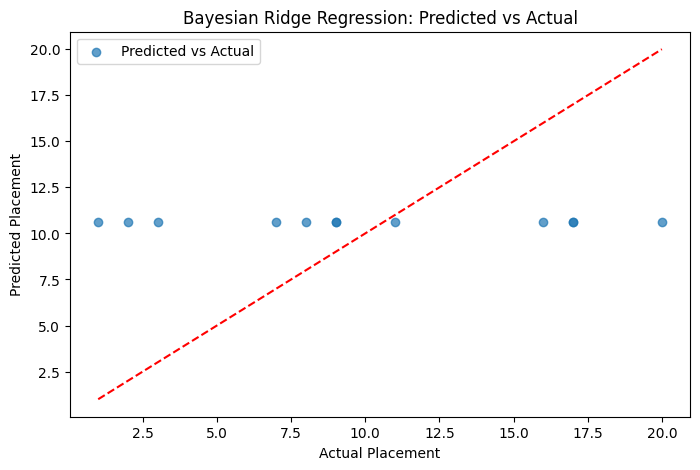

In [12]:
# Train Bayesian Ridge model
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train)

# Predict on test set
y_pred = bayes_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Plot Actual vs. Predicted placements
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--")  # 45-degree line
plt.xlabel("Actual Placement")
plt.ylabel("Predicted Placement")
plt.legend()
plt.title("Bayesian Ridge Regression: Predicted vs Actual")
plt.show()
